fwi:34.807248
bui:124.46090000000005
isi:12.155942000000007


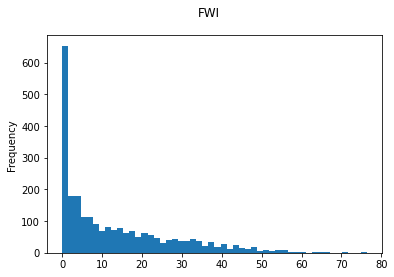

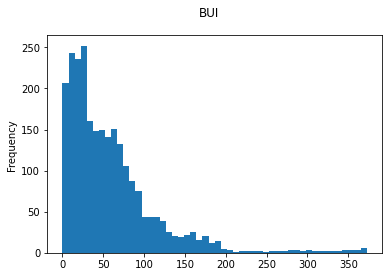

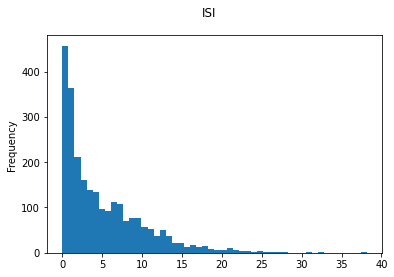

In [1]:
import pandas
import matplotlib.pyplot as plt

daily_weather_data = pandas.read_csv('../Ashnola Jan1 2009-Feb 7-2020.csv')

metrics = ('ffmc', 'bui', 'isi')


for metric in metrics:
    fig = plt.figure()
    df = daily_weather_data[metric].dropna()
    a = df.plot.hist(bins=50, title=metric.upper(), subplots=True)
    print('{}:{}'.format(metric, df.quantile(0.9)))

# index = daily_weather_data[daily_weather_data['fwi']].index
 
# daily_weather_data['fwi']




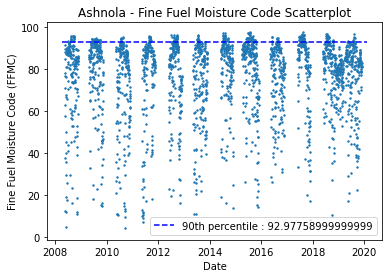

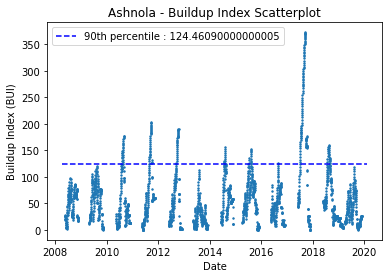

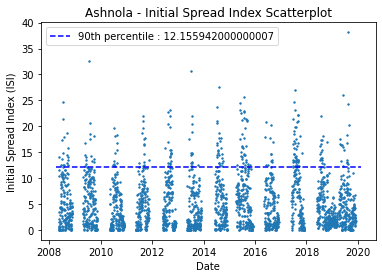

In [48]:
from datetime import date
import pandas
import matplotlib.pyplot as plt

daily_weather_data = pandas.read_csv('../Ashnola Jan1 2009-Feb 7-2020.csv')

metrics = (
    {'key': 'ffmc', 'description': 'Fine Fuel Moisture Code', 'station': 'Ashnola'},
    {'key': 'bui', 'description': 'Buildup Index', 'station': 'Ashnola'},
    {'key': 'isi', 'description': 'Initial Spread Index', 'station': 'Ashnola'})

# Clean
for metric in metrics:
    daily_weather_data[metric['key']] = daily_weather_data[metric['key']].dropna()
# Extract real date
daily_weather_data['weather_date'] = daily_weather_data['weather_date'].apply(str)
daily_weather_data['tmp'] = daily_weather_data['weather_date'].apply(lambda x: date(int(x[:4]), int(x[4:6]), int(x[6:])))

# Get min and max x
min_date = daily_weather_data['tmp'].min()
max_date = daily_weather_data['tmp'].max()

# Plot
for metric in metrics:
    quantile = daily_weather_data[metric['key']].quantile(0.9)
    fig = plt.figure()
    ax1 = fig.add_subplot()
    ax1.set_xlabel('Date')
    ax1.set_ylabel('{} ({})'.format(metric['description'], metric['key'].upper()))
    ax1.set_title("{} - {} Scatterplot".format(metric['station'], metric['description']))
    plt.hlines(quantile, xmin=min_date, xmax=max_date, colors='b', linestyles='dashed', label='90th percentile : {}'.format(quantile))
    plt.scatter(daily_weather_data['tmp'], daily_weather_data[metric['key']], 2)
    plt.legend()
    fig.savefig('thing.png')
# df = daily_weather_data[metric].dropna()
# df.plot.scatter('weather_date', 'fwi')
#daily_weather_data.plot.scatter('tmp', 'fwi', 1)


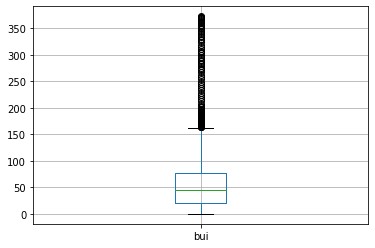

In [36]:
boxplot = daily_weather_data.boxplot(column=['bui'])

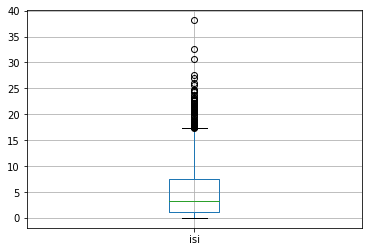

In [37]:
boxplot = daily_weather_data.boxplot(column=['isi'])

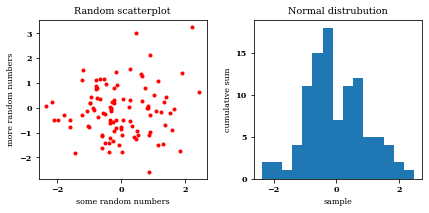

In [52]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

with mpl.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 8}):
    fig = plt.figure(figsize=(6,3))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('some random numbers')
    ax1.set_ylabel('more random numbers')
    ax1.set_title("Random scatterplot")
    plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
    ax2 = fig.add_subplot(122)
    plt.hist(np.random.normal(size=100), bins=15)
    ax2.set_xlabel('sample')
    ax2.set_ylabel('cumulative sum')
    ax2.set_title("Normal distrubution")
    plt.tight_layout()
    plt.savefig("normalvars.png", dpi=150)

In [8]:
from datetime import date
date('2019', '1', '1')

TypeError: an integer is required (got type str)

In [87]:
import pandas as pd
df = pd.read_csv('../DailyWeather.csv')

df.loc[df['station_code'] == 836]['ffmc']

2158654    90.000000
2158655    89.746925
2158656    91.785271
2158657    91.835220
2158658    90.212791
             ...    
2163545    91.470840
2163546    90.024544
2163547    90.073906
2163548    90.123291
2163549    91.414955
Name: ffmc, Length: 4896, dtype: float64

In [88]:
#import pandas as pd
#df = pd.read_csv('../DailyWeather.csv')
#df['station_code'].dropna()

df.loc[df['station_code'] == 503]['ffmc']

1991898   NaN
1991899   NaN
1991900   NaN
1991901   NaN
1991902   NaN
           ..
1996084   NaN
1996085   NaN
1996086   NaN
1996087   NaN
1996088   NaN
Name: ffmc, Length: 4191, dtype: float64

In [89]:
df.dropna(subset = ['ffmc'], inplace=True)
df.loc[df['station_code'] == 503]['ffmc']
#index = df[df['ffmc'].isna()]
#df.drop(index, inplace=True3)
#df.loc[df['station_code'] == 836]['ffmc']



Series([], Name: ffmc, dtype: float64)

In [90]:
df.loc[df['station_code'] == 836]['ffmc']

2158654    90.000000
2158655    89.746925
2158656    91.785271
2158657    91.835220
2158658    90.212791
             ...    
2163545    91.470840
2163546    90.024544
2163547    90.073906
2163548    90.123291
2163549    91.414955
Name: ffmc, Length: 3875, dtype: float64

In [20]:
import pandas as pd
df = pd.read_csv('../DailyWeather.csv', nrows=10)

df = df.dropna(subset=['ffmc'])
#df = df.loc[(df['ffmc_valid'] == True) & (df['station_code'] == 322)]
df[['weather_date', 'ffmc']].to_json(orient='records')
#df.head()
#df[['weather_date', 'ffmc']]

'[{"weather_date":19700525,"ffmc":85.4000015259},{"weather_date":19700526,"ffmc":86.0},{"weather_date":19700527,"ffmc":85.0},{"weather_date":19700528,"ffmc":84.0},{"weather_date":19700529,"ffmc":75.3000030518},{"weather_date":19700530,"ffmc":81.0},{"weather_date":19700531,"ffmc":86.5999984741},{"weather_date":19700601,"ffmc":93.5999984741},{"weather_date":19700602,"ffmc":93.5999984741},{"weather_date":19700603,"ffmc":82.5999984741}]'